In [1]:
import os
import numpy as np
import hoomd
import rowan
import pickle
from cmeutils.visualize import FresnelGSD
from src.rigid_simulation import create_rigid_simulation, rigid_energy_forces
from src.quaternions import rotate_quaternion, dr_orientation_angles

In [2]:
n_rigids = 2

In [3]:
rel_const_pos = np.load('../assets/rel_const_pos.npy')
init_gsd = '../assets/rigid_init_2.gsd'
with open('../assets/pps_ff.pkl', 'rb') as f:
    pps_ff = pickle.load(f)

In [4]:
gsd_dir = 'snapshots'
if not os.path.exists(gsd_dir):
    os.mkdir(gsd_dir)

## Ellipsoid Arrangmenets (with constant center-to-center distance R=1.7)

In [6]:
rigid_pos = np.array([[-0.85, 0, 0], [0.85, 0, 0]])
dr = rigid_pos[0] - rigid_pos[1]
R = np.linalg.norm(dr)
print('center-to-center distance: ', R)

center-to-center distance:  1.7


In [15]:
logs = {}

### 1. side-to-side with S aligned (tail-tail)

potential energy:  -2.0705250402157604
forces:  [ 1.29837254e+00 -2.14121694e-06 -6.30923563e-08]


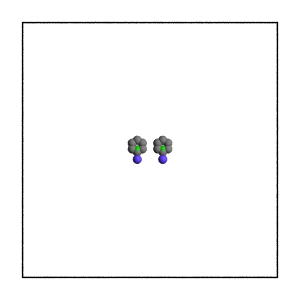

In [16]:
q1 = [1, 0, 0, 0]
q2= [1, 0, 0,0]
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['side-side-tail-tail'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/side-side-tail-tail.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/side-side-tail-tail.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 2. side-to-side with S opposite (tail-head)

potential energy:  -2.2086757854063634
forces:  [ 4.95977547e+00  9.04878750e-04 -2.16035501e-02]


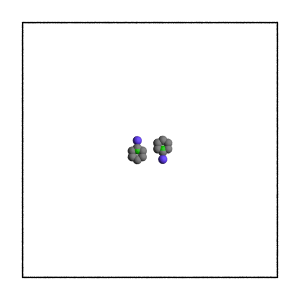

In [17]:
q1 = [1, 0, 0, 0]
q2= rotate_quaternion(q1, theta=np.pi, axis='x')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['side-side-tail-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/side-side-tail-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/side-side-tail-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()


### 3. face-to-face S aligned (tail-tail)

potential energy:  -1.1891979798755568
forces:  [ 3.64676078e+00 -9.35827166e-07 -7.34345221e-02]


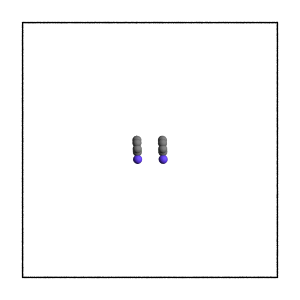

In [18]:
q1 = rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
q2= rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['face-face-tail-tail'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/face-face-tail-tail.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/face-face-tail-tail.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 4. face-to-face S opposite (tail-head)

potential energy:  -1.1896723436713859
forces:  [ 3.64506688e+00 -1.67152831e-06  1.87564194e-02]


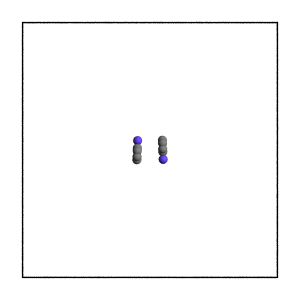

In [19]:
q1 = rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
q2= rotate_quaternion(q1, theta=np.pi, axis='x')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['face-face-tail-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/face-face-tail-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/face-face-tail-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 5. side-to-face s aligned (tail-tail)

potential energy:  -1.6676152292679463
forces:  [ 5.41901711  0.00764251 -0.24123866]


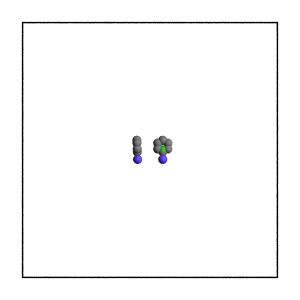

In [20]:
q1 = [1, 0, 0, 0]
q2= rotate_quaternion(q1, theta=np.pi/2, axis='z')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['side-face-tail-tail'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/side-face-tail-tail.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/side-face-tail-tail.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 6. side-to-face s opposite (tail-head)

potential energy:  -1.687354459389348
forces:  [ 5.4715061   0.01525854 -0.06549757]


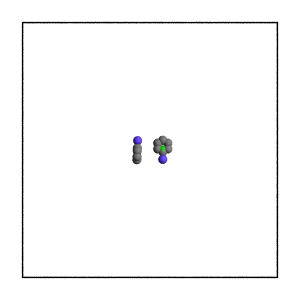

In [21]:
q1 = [1, 0, 0, 0]
q2= rotate_quaternion(rotate_quaternion(q1, theta=np.pi/2, axis='z'), theta=np.pi, axis='x')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['side-face-tail-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/side-face-tail-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/side-face-tail-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 7. end-to-end s aligned (tail-head)

potential energy:  38341.14384760931
forces:  [-1.06692961e+06 -7.32145178e-04 -1.23731220e+05]


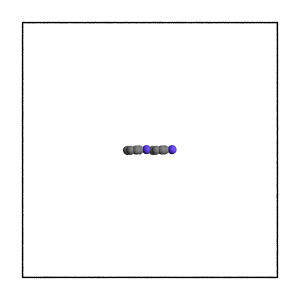

In [22]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2= q1
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['end-end-tail-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/end-end-tail-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/end-end-tail-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 8. end-to-end s opposite (head-head)

potential energy:  31277.388217285086
forces:  [-9.25575528e+05  4.55884219e-11 -1.17082471e+05]


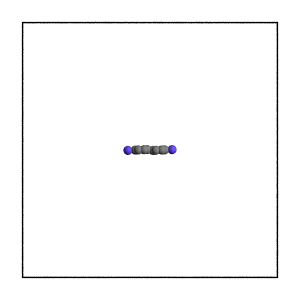

In [23]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2= rotate_quaternion(q1, theta=np.pi, axis='y')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['end-end-head-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/end-end-head-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/end-end-head-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 9. end-to-end s close (tail-tail)

potential energy:  49094.477786340154
forces:  [-1.29066533e+06  4.66204575e-11 -1.37785364e+05]


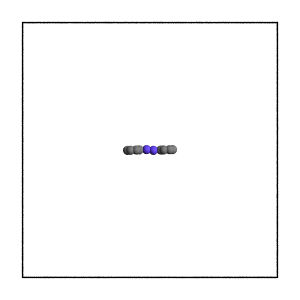

In [24]:
q2= rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q1 =  rotate_quaternion(q2, theta=np.pi, axis='y')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['end-end-tail-tail'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/end-end-tail-tail.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/end-end-tail-tail.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 10. side-to-end s far (tail-head)

potential energy:  24.28783905361299
forces:  [-483.26817337    2.32881414  -80.79456558]


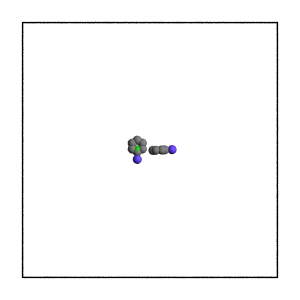

In [25]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2= [1, 0, 0, 0]
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['side-end-tail-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/side-end-tail-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/side-end-tail-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 11. side-to-end s close (tail-tail)

potential energy:  42.15897273821685
forces:  [-785.27745893    3.98040986 -128.94753169]


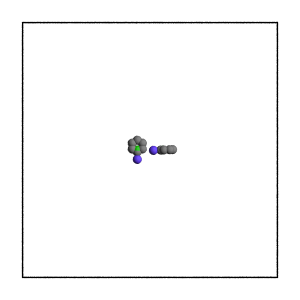

In [27]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q1 = rotate_quaternion(q1, theta=np.pi, axis='y')
q2= [1, 0, 0, 0]
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['side-end-tail-tail'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/side-end-tail-tail.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/side-end-tail-tail.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 12. face-to-end s far (tail-head)

potential energy:  -3.08210000771699
forces:  [6.79019243e+00 1.33083696e-06 1.12563425e-01]


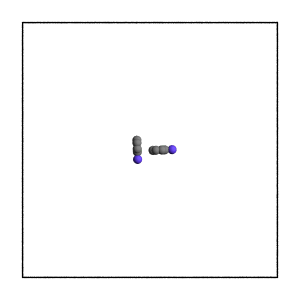

In [29]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2=  rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)

energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['face-end-tail-head'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/face-end-tail-head.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/face-end-tail-head.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

### 13. face-to-end s close (tail-tail)

potential energy:  -3.538435099901177
forces:  [5.75635684e+00 3.23067591e-06 2.53321555e-01]


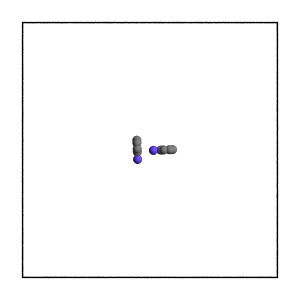

In [30]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q1 = rotate_quaternion(q1, theta=np.pi, axis='y')
q2 = rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=rigid_pos,
                                           n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                          pps_ff=pps_ff, init_gsd=init_gsd)
energy, forces = rigid_energy_forces(rigid_simulation, n_rigids)
print('potential energy: ', energy)
print('forces: ', forces[0])
logs['face-end-tail-tail'] = {'dr': dr, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energy,
                         'forces': forces
                        }
hoomd.write.GSD.write(rigid_simulation.state, filename=f"{gsd_dir}/face-end-tail-tail.gsd")
# looking down the y axis
sim_viewer = FresnelGSD(gsd_file=f"{gsd_dir}/face-end-tail-tail.gsd", view_axis=(0, 1, 0), frame=-1, height=20,
                       color_dict={"sh": (0.42,0.267,1), "ca":(0.5, 0.5, 0.5), "rigid":(0.1, 0.8, 0.)}
                    )
sim_viewer.view()

In [33]:
import json
with open("ellipsoid_arrangment_logs.json", "w") as outfile: 
    json.dump(logs, outfile)


TypeError: Object of type ndarray is not JSON serializable